# Occurrence frequencies of IVT object for regional control ICON experiment forced by CNMR (1984-2014)

In [14]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import load_pkl, create_datetime_lists, get_datetime_str, count_objs_grid_points 
from src.Enumerations import Month, Season, Experiments
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Settings

In [19]:
exp_CNRM=Experiments.ICON_CNRM_CONTROL.value
exp_ERA5=Experiments.ERA5.value

type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_CNRM = 'MOAPP_ICON_100and85controlperc_remapped_3x'

first_year = 1984
last_year = 1985
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [20]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5, input_file_name_temp_ERA5, type_, first_year, last_year,load_coordinates=True)
IVT_objs_CNRM = load_tracking_objects(input_path_CNRM, input_file_name_temp_CNRM, type_, first_year, last_year,load_coordinates=True)

 
    
  

1984-01-01 00:00:00
1984-07-01 00:00:00
1984-01-01 00:00:00
1984-07-01 00:00:00


In [8]:
IVT_objs_ERA5[0]

<xarray.Dataset> Size: 1kB
Dimensions:          (times: 20)
Coordinates:
  * times            (times) datetime64[ns] 160B 1984-01-01T01:00:00 ... 1984...
Data variables:
    id_              <U5 20B '50001'
    size             (times) float64 160B 3.884e+05 3.798e+05 ... 3.306e+03
    total_IVT        (times) float32 80B 4.21e+04 4.082e+04 ... 1.219e+03 301.8
    mean_IVT         (times) float32 80B 119.3 118.3 117.8 ... 103.0 101.5 100.6
    max_IVT          (times) float32 80B 162.1 156.2 152.4 ... 105.7 103.1 101.1
    min_IVT          (times) float32 80B 100.4 100.3 100.0 ... 100.1 100.0 100.3
    mass_center_idy  (times) float64 160B 14.33 13.76 13.48 ... 12.75 12.33
    mass_center_idx  (times) float64 160B 23.38 24.03 23.98 ... 43.33 45.33
    track            (times) object 160B RotatedGridPoint(lat=7.9000000953674...
    speed            (times) float64 160B nan 28.46 9.078 ... 55.09 61.96 66.55
    gridpoints       (times) object 160B [RotatedGridPoint(lat=4.300000190734...

In [23]:
exp_ERA5.BMU_file

'ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_DJF_fldmean_detrend_del29feb_aac_20PCs_4clusters_Ref_ERA5KmeansPCA.csv'

In [25]:
a=pd.read_csv(exp_ERA5.BMU_path+exp_ERA5.BMU_file)

In [26]:
a

,time,cluster_id,cluster_name
0,1984-01-01 12:00:00,2,ATL-
1,1984-01-02 12:00:00,2,ATL-
2,1984-01-03 12:00:00,2,ATL-
3,1984-01-04 12:00:00,0,NAO+
4,1984-01-05 12:00:00,0,NAO+
...,...,...,...
2785,2014-12-27 12:00:00,1,NAO-
2786,2014-12-28 12:00:00,3,SCAN
2787,2014-12-29 12:00:00,3,SCAN
2788,2014-12-30 12:00:00,0,NAO+


# Plot number of days per season where a grid cell is part of an IVT object

Season.WINTER
Season.SPRING
Season.SUMMER
Season.AUTUMN


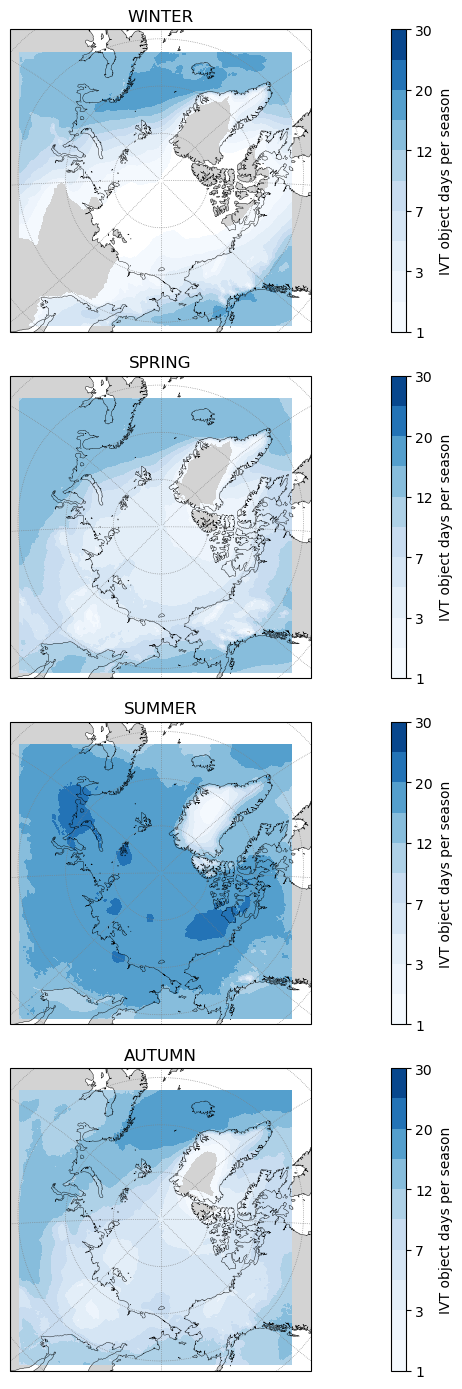

In [8]:
fig = plt.figure(figsize=(80,14))

for i, season_ in enumerate(Season):
    print (season_)
    IVTobjs_sel = IVT_objs.sel_season(season_)

    lon,lat,count = count_objs_grid_points(IVTobjs_sel)
    
    # normalize grid point counts to counts per season
    count= count/num_years
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  count, 
                                  fig=fig,
                                  index = i,
                                  title=season_.name,
                                  cbar_label = "IVT object days per season")
    
plt.tight_layout()
